<a href="https://colab.research.google.com/github/sushassassin/VAC_ImageProcessing/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML
from subprocess import getoutput
s = getoutput('nvidia-smi')
if 'K80' in s:
    gpu = 'K80'
elif 'T4' in s:
    gpu = 'T4'
elif 'P100' in s:
    gpu = 'P100'
else:
    gpu='DONT PROCEED'
display(HTML(f"<h1>{gpu}</h1>"))

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
IMAGE_SIZE = [224, 224]

In [8]:
train_path = '/content/gdrive/MyDrive/image processing/Assignment2/train'
test_path = '/content/gdrive/MyDrive/image processing/Assignment2/test'

In [9]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis

Working with 1440 images
Image examples: 
1351.jpg


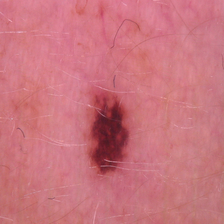

135.jpg


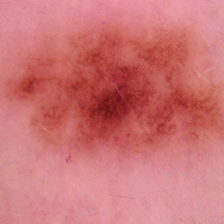

1349.jpg


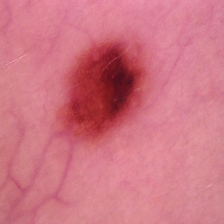

1352.jpg


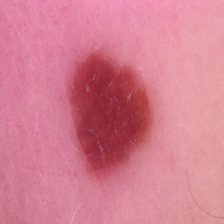

1348.jpg


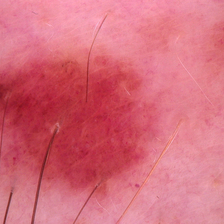

1341.jpg


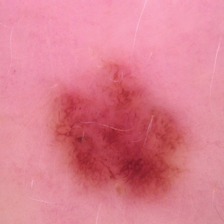

1340.jpg


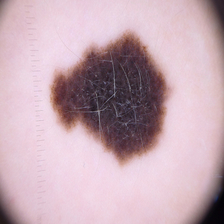

1425.jpg


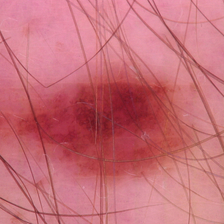

1424.jpg


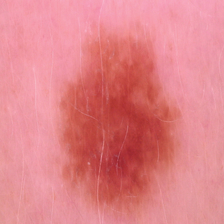

1426.jpg


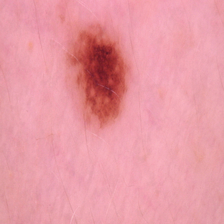

1423.jpg


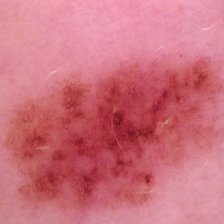

1422.jpg


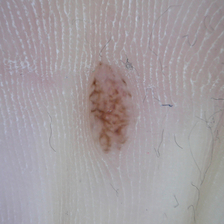

1421.jpg


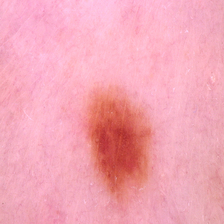

1420.jpg


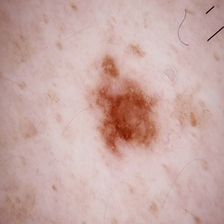

142.jpg


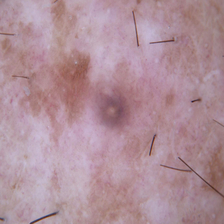

1419.jpg


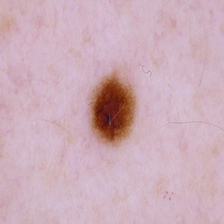

1418.jpg


1417.jpg


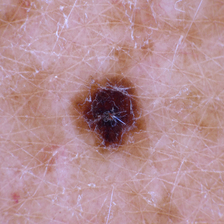

141.jpg


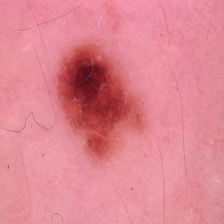

1410.jpg


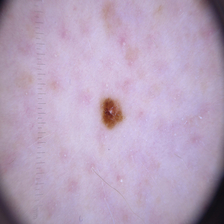

1416.jpg


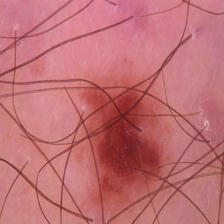

1414.jpg


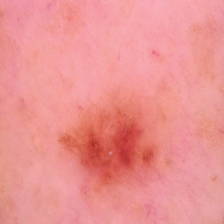

1413.jpg


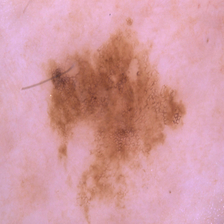

1408.jpg


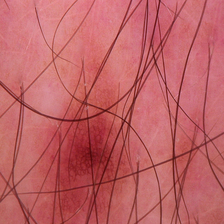

1407.jpg


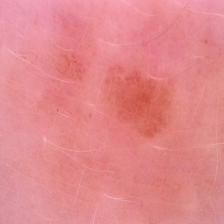

1406.jpg


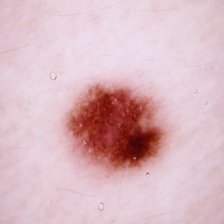

1411.jpg


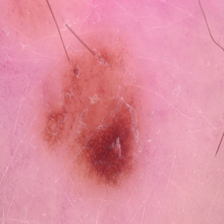

1405.jpg


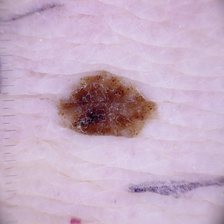

1404.jpg


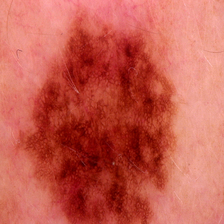

1403.jpg


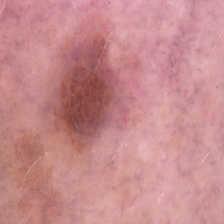

1402.jpg


1399.jpg


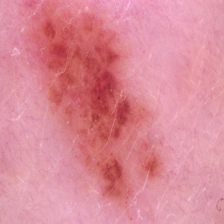

1398.jpg


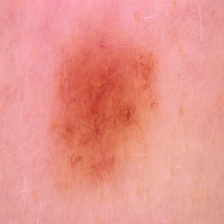

14.jpg


1397.jpg


1396.jpg


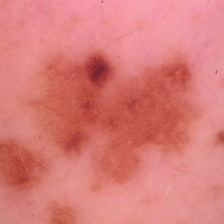

1395.jpg


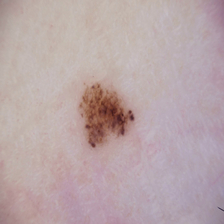

1394.jpg


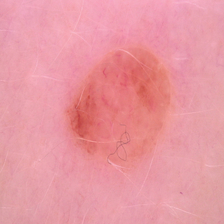

1392.jpg


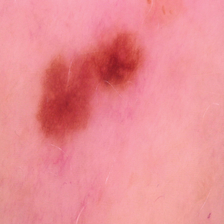

1391.jpg


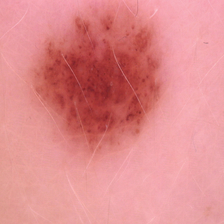

1390.jpg


139.jpg


1388.jpg


1389.jpg


1387.jpg


1386.jpg


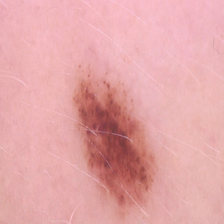

1385.jpg


1383.jpg


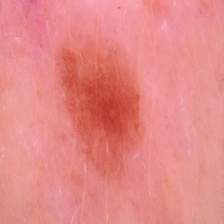

1382.jpg


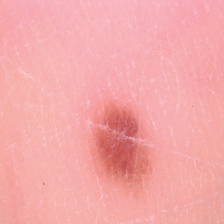

1380.jpg


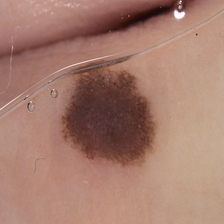

1384.jpg


138.jpg


1371.jpg


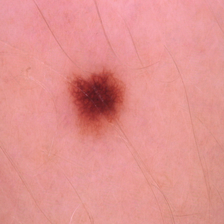

1370.jpg


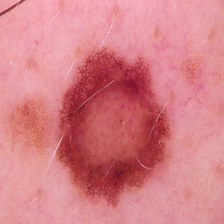

1379.jpg


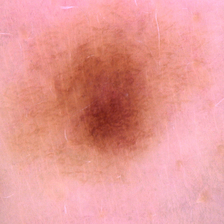

1375.jpg


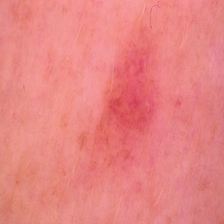

1374.jpg


137.jpg


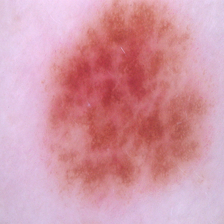

1369.jpg


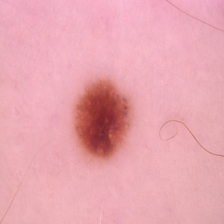

1368.jpg


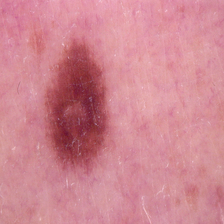

1372.jpg


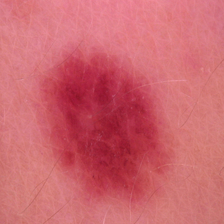

1366.jpg


1364.jpg


1363.jpg


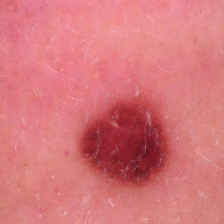

1361.jpg


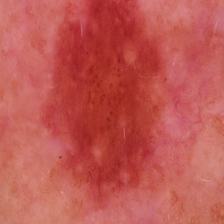

1356.jpg


136.jpg


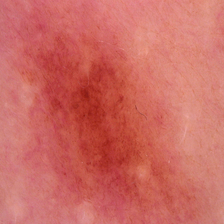

1360.jpg


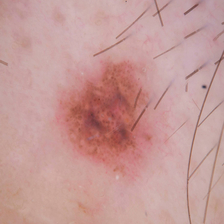

1358.jpg


1355.jpg


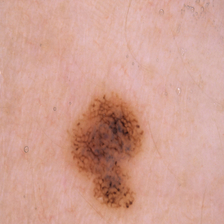

1353.jpg


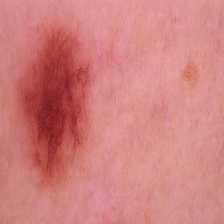

1478.jpg


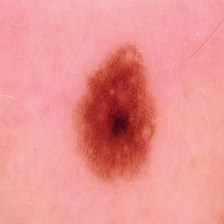

1477.jpg


1475.jpg


1470.jpg


1469.jpg


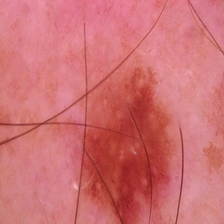

1467.jpg


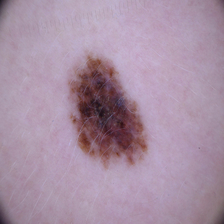

1476.jpg


1465.jpg


1464.jpg


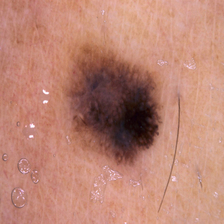

1463.jpg


1461.jpg


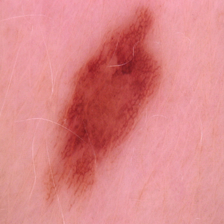

1460.jpg


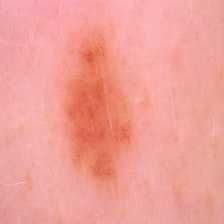

1462.jpg


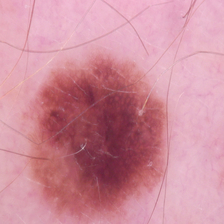

146.jpg


1459.jpg


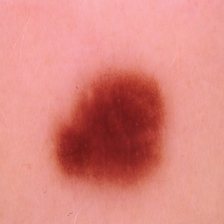

1458.jpg


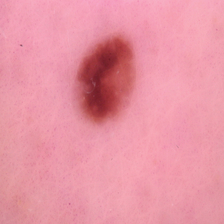

1457.jpg


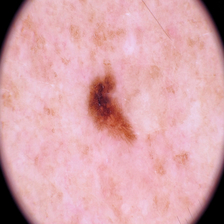

1456.jpg


1455.jpg


1454.jpg


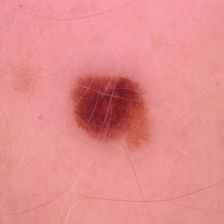

1453.jpg


1447.jpg


1452.jpg


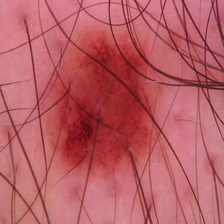

1446.jpg


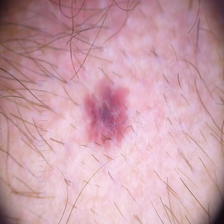

1444.jpg


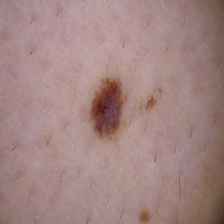

1442.jpg


1451.jpg


1450.jpg


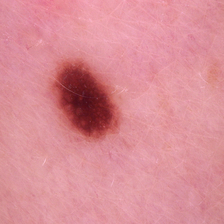

145.jpg


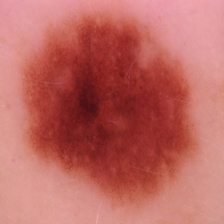

In [11]:
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(100):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [12]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [13]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [14]:
folders = glob('/content/gdrive/MyDrive/image processing/Assignment2/train*')
print(len(folders))

1


In [15]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
from tensorflow import keras
from keras import optimizers

#adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [19]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [23]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [24]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [26]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=2,
  validation_steps=30,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
2/2 - 114s - loss: 0.6935 - accuracy: 0.5000 - 114s/epoch - 57s/step
Epoch 2/50
2/2 - 114s - loss: 0.6936 - accuracy: 0.5000 - 114s/epoch - 57s/step
Epoch 3/50
2/2 - 119s - loss: 0.6933 - accuracy: 0.5000 - 119s/epoch - 60s/step
Epoch 4/50
2/2 - 117s - loss: 0.6933 - accuracy: 0.5000 - 117s/epoch - 59s/step
Epoch 5/50
2/2 - 118s - loss: 0.6932 - accuracy: 0.5000 - 118s/epoch - 59s/step
Epoch 6/50
2/2 - 118s - loss: 0.6932 - accuracy: 0.5000 - 118s/epoch - 59s/step
Epoch 7/50
2/2 - 118s - loss: 0.6933 - accuracy: 0.5000 - 118s/epoch - 59s/step
Epoch 8/50
2/2 - 118s - loss: 0.6932 - accuracy: 0.5000 - 118s/epoch - 59s/step
Epoch 9/50
2/2 - 118s - loss: 0.6933 - accuracy: 0.5000 - 118s/epoch - 59s/step
Epoch 10/50
2/2 - 118s - loss: 0.6933 - accuracy: 0.5000 - 118s/epoch - 59s/step
Epoch 11/50
2/2 - 118s - loss: 0.6932 - accuracy: 0.5000 - 118s/epoch - 59s/step
Epoch 12/50
2/2 - 119s - loss: 0.6932 - accuracy: 0.5000 - 119s/epoch - 60s/step
Epoch 13/50
2/2 - 118s - loss: 0.6932

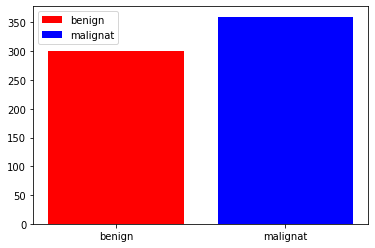

In [27]:
fig, ax = plt.subplots()
ax.bar(["benign"],[300],color= "r",label='benign')
ax.bar(["malignat"],[360],color ="b",label ="malignat")
ax.legend()

benign


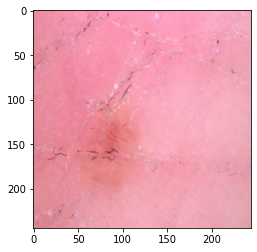

In [30]:
from keras.preprocessing import image
import numpy as np
image_path = "/content/gdrive/MyDrive/image processing/Assignment2/data/test/benign/1006.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("benign")
plt.imshow(new_img)

malignant


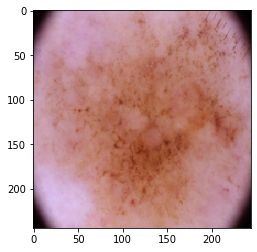

In [31]:
from keras.preprocessing import image
import numpy as np
image_path = "/content/gdrive/MyDrive/image processing/Assignment2/data/test/malignant/1080.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("malignant")
plt.imshow(new_img)